In [8]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import psycopg2 # needed to get database exception errors when uploading dataframe
import requests # package for getting data from the web
from zipfile import * # package for unzipping zip files

In [9]:
# Import the get_engine function from our sql_functions.
from sql_functions import get_engine #adjust this as necessary to match your sql_functions.py connection methods

In [10]:
# Specifies path for saving file
path ='data/' 

In [ ]:
# function to get specified csv file from the website https://transtats.bts.gov

def download_data(year, month):
    # Get the file from the website https://transtats.bts.gov
    zip_file = f'On_Time_Reporting_Carrier_On_Time_Performance_1987_present_{year}_{month}.zip'
    url = (f'https://transtats.bts.gov/PREZIP/{zip_file}')
    # Download the database
    r = requests.get(f'{url}', verify=False)
    # Save database to local file storage
    with open(path+zip_file, 'wb') as f:
        f.write(r.content)
        print(f'--> zip_file with name: {zip_file} downloaded succesfully.' )
    

In [ ]:
# function to extract the csv files inside the zip files

def extract_zip(year, month):
    # Get the file from the website https://transtats.bts.gov
    zip_file = f'On_Time_Reporting_Carrier_On_Time_Performance_1987_present_{year}_{month}.zip'
    with ZipFile(path+zip_file, 'r') as zip_ref:
        zip_ref.extractall(path)
        csv_file =  zip_ref.namelist()[0]
        print(f'--> zip_file was succesfully extracted to: {csv_file}.' )

In [ ]:
#extract_zip(2016)

In [ ]:
# reference codes
years_list = [2020, 2021] # list of years you want to look at (can of course also be a single year)
months_list = [1, 2] # list of months you want to look at (can of course also be a single month)

# download flights data as zipfile(s)
# we use a nested loop to specify the years and months to define the range of the data we would like to have 
for year in years_list:
    for month in months_list:
        download_data(year, month)
        extract_zip(year, month)

In [ ]:
# Used these codes to download and extract zip.
years_list = [2016] # list of years you want to look at (can of course also be a single year)
months_list = [1] # list of months you want to look at (can of course also be a single month)

# download flights data as zipfile(s)
# we use a nested loop to specify the years and months to define the range of the data we would like to have 
for year in years_list:
    for month in months_list:
        download_data(year, month)
        extract_zip(year, month)

/opt/miniconda3/envs/nf_sql/lib/python3.10/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'transtats.bts.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


--> zip_file with name: On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2016_1.zip downloaded succesfully.
--> zip_file was succesfully extracted to: On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2016_1.csv.


In [ ]:
# Get Jan 2016  cvs file from the website https://transtats.bts.gov
download_data('2016', 'January')

--> zip_file with name: On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2016_January.zip downloaded succesfully.


/opt/miniconda3/envs/nf_sql/lib/python3.10/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'transtats.bts.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [ ]:
# reference codes
# define the name of the csv file you want to read in
csv_file = '______'

# Read in your data
df = pd.read_csv(path+csv_file, low_memory = False)
display(df.shape)
display(df.head())

In [36]:
# codes ran to  read csv file
# define the name of the csv file you want to read in
csv_file = 'On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2016_1.csv'

# Read in your data
df = pd.read_csv(path+csv_file, low_memory = False)
display(df.shape)
display(df.head())

(445827, 110)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2016,1,1,6,3,2016-01-06,AA,19805,AA,N4YBAA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,1,1,7,4,2016-01-07,AA,19805,AA,N434AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,1,1,8,5,2016-01-08,AA,19805,AA,N541AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,1,1,9,6,2016-01-09,AA,19805,AA,N489AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,1,1,10,7,2016-01-10,AA,19805,AA,N439AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# my codes for checking data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445827 entries, 0 to 445826
Columns: 110 entries, Year to Unnamed: 109
dtypes: float64(71), int64(21), object(18)
memory usage: 374.2+ MB


In [38]:
# my codes for checking column names
df.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'DOT_ID_Reporting_Airline',
       'IATA_CODE_Reporting_Airline', 'Tail_Number',
       ...
       'Div4TailNum', 'Div5Airport', 'Div5AirportID', 'Div5AirportSeqID',
       'Div5WheelsOn', 'Div5TotalGTime', 'Div5LongestGTime', 'Div5WheelsOff',
       'Div5TailNum', 'Unnamed: 109'],
      dtype='object', length=110)

In [39]:
# Columns from downloaded file that are to be kept

columns_to_keep = [
                'FlightDate',
                'DepTime',
                'CRSDepTime',
                'DepDelay',
                'ArrTime',
                'CRSArrTime',
                'ArrDelay',
                'Reporting_Airline',
                'Tail_Number',
                'Flight_Number_Reporting_Airline',
                'Origin',
                'Dest',
                'AirTime',
                'ActualElapsedTime',
                'Distance',
                'Cancelled',
                'Diverted'
]

In [ ]:
# The columns in the database have different naming as in the source csv files. Lets get the names from the database

schema = '______' # UPDATE 'TABLE_SCHEMA' based on schema used in class 
engine = get_engine() # assign engine to be able to query against the database

table_name_sql = f'''SELECT COLUMN_NAME 
                    FROM INFORMATION_SCHEMA.COLUMNS 
                    WHERE TABLE_NAME = 'flights'
                    AND TABLE_SCHEMA ='{schema}'
                    ORDER BY ordinal_position'''
c_names = engine.execute(table_name_sql).fetchall()
c_names

In [40]:
# codes ran
# The columns in the database have different naming as in the source csv files. Lets get the names from the database

schema = 'cgn_analytics_24_3' # UPDATE 'TABLE_SCHEMA' based on schema used in class 
engine = get_engine() # assign engine to be able to query against the database

table_name_sql = f'''SELECT COLUMN_NAME 
                    FROM INFORMATION_SCHEMA.COLUMNS 
                    WHERE TABLE_NAME = 'flights'
                    AND TABLE_SCHEMA ='{schema}'
                    ORDER BY ordinal_position'''
c_names = engine.execute(table_name_sql).fetchall()
c_names

[('flight_date',),
 ('dep_time',),
 ('sched_dep_time',),
 ('dep_delay',),
 ('arr_time',),
 ('sched_arr_time',),
 ('arr_delay',),
 ('airline',),
 ('tail_number',),
 ('flight_number',),
 ('origin',),
 ('dest',),
 ('air_time',),
 ('actual_elapsed_time',),
 ('distance',),
 ('cancelled',),
 ('diverted',)]

In [41]:
# we can clean up the results into a clean list
new_column_names=[]
for name in c_names:
    new_column_names.append(name[0])
new_column_names        

['flight_date',
 'dep_time',
 'sched_dep_time',
 'dep_delay',
 'arr_time',
 'sched_arr_time',
 'arr_delay',
 'airline',
 'tail_number',
 'flight_number',
 'origin',
 'dest',
 'air_time',
 'actual_elapsed_time',
 'distance',
 'cancelled',
 'diverted']

In [42]:
def clean_airline_df(df):
    '''
    Transforms a df made from BTS csv file into a df that is ready to be uploaded to SQL
    Set rows=0 for no filtering
    '''

    # Build dataframe including only the columns you want to keep
    df_airline = df.loc[:,columns_to_keep]
     
    # Clean data types and NULLs
    df_airline['FlightDate']= pd.to_datetime(df_airline['FlightDate'], yearfirst=True)
    df_airline['CRSArrTime']= pd.to_numeric(df_airline['CRSArrTime'], downcast='integer', errors='coerce')
    df_airline['Cancelled']= pd.to_numeric(df_airline['Cancelled'], downcast='integer')
    df_airline['Diverted']= pd.to_numeric(df_airline['Diverted'], downcast='integer')
    df_airline['ActualElapsedTime']= pd.to_numeric(df_airline['ActualElapsedTime'], downcast='integer', errors='coerce')
    
    # Rename columns
    df_airline.columns = new_column_names
    
    return df_airline

In [43]:
# Call function and check resulting dataframe
df_clean = clean_airline_df(df)
df_clean.head()

,flight_date,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,airline,tail_number,flight_number,origin,dest,air_time,actual_elapsed_time,distance,cancelled,diverted
0,2016-01-06,1057.0,1100,-3.0,1432.0,1438,-6.0,AA,N4YBAA,43,DFW,DTW,132.0,155.0,986.0,0,0
1,2016-01-07,1056.0,1100,-4.0,1426.0,1438,-12.0,AA,N434AA,43,DFW,DTW,126.0,150.0,986.0,0,0
2,2016-01-08,1055.0,1100,-5.0,1445.0,1438,7.0,AA,N541AA,43,DFW,DTW,135.0,170.0,986.0,0,0
3,2016-01-09,1102.0,1100,2.0,1433.0,1438,-5.0,AA,N489AA,43,DFW,DTW,129.0,151.0,986.0,0,0
4,2016-01-10,1240.0,1100,100.0,1631.0,1438,113.0,AA,N439AA,43,DFW,DTW,137.0,171.0,986.0,0,0


In [44]:
# Specify the airports you are interested in and put them as a list in the function.
def select_airport(df, airports):
    ''' Helper function for filtering the airline dataframe for a subset of airports'''
    df_out = df.loc[(df.origin.isin(airports)) | (df.dest.isin(airports))]
    return df_out

In [45]:
# Execute function, filtering for New York area airports
airports=['JFK', 'LGA', 'EWR', 'PHL', 'IAD', 'DCA']
if len(airports) > 0:
    df_selected_airports = select_airport(df_clean, airports)
else:
    df_selected_airports = df_clean
    
df_selected_airports.head()

,flight_date,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,airline,tail_number,flight_number,origin,dest,air_time,actual_elapsed_time,distance,cancelled,diverted
57,2016-01-01,741.0,745,-4.0,1610.0,1602,8.0,AA,N3HMAA,44,SEA,JFK,294.0,329.0,2422.0,0,0
58,2016-01-02,737.0,745,-8.0,1613.0,1602,11.0,AA,N3BDAA,44,SEA,JFK,292.0,336.0,2422.0,0,0
59,2016-01-03,743.0,745,-2.0,1547.0,1602,-15.0,AA,N3KJAA,44,SEA,JFK,277.0,304.0,2422.0,0,0
60,2016-01-04,737.0,745,-8.0,1551.0,1602,-11.0,AA,N3FWAA,44,SEA,JFK,294.0,314.0,2422.0,0,0
61,2016-01-05,708.0,710,-2.0,1524.0,1527,-3.0,AA,N3ESAA,44,SEA,JFK,296.0,316.0,2422.0,0,0


In [ ]:
# Specify which table within your database you want to push your data to. Give your table an unambiguous name.
# Example: flights_sp for Sina's flights table, flights_groupname or similar
table_name = 'flights_wj201601'
# If the specified table doesn't exist yet, it will be created
# With 'replace', your data will be replaced if the table already exists.
# This may take some time ...

# Write records stored in a dataframe to SQL database
if engine!=None:
    try:
        df_selected_airports.to_sql(name=table_name, # Name of SQL table
                        con=engine, # Engine or connection
                        if_exists='replace', # Drop the table before inserting new values 
                        schema=schema, # Use schmea that was defined earlier
                        index=False, # Write DataFrame index as a column
                        chunksize=5000, # Specify the number of rows in each batch to be written at a time
                        method='multi') # Pass multiple values in a single INSERT clause
        print(f"The {table_name} table was imported successfully.")
    # Error handling
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        engine = None

The flights_wj201601 table was imported successfully.


In [ ]:
# Just to be sure: Check if the number of rows match
table_name_sql = f'''SELECT count(*) 
                    FROM {schema}.{table_name}
                    '''
engine.execute(table_name_sql).fetchall()[0][0] == df_selected_airports.shape[0]

True

In [47]:
from sql_functions import get_dataframe

In [48]:
df_flights = get_dataframe(f'SELECT * FROM cgn_analytics_24_3.flights_wj201601')

df_flights.head()

,flight_date,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,airline,tail_number,flight_number,origin,dest,air_time,actual_elapsed_time,distance,cancelled,diverted
0,2016-01-01,741.0,745,-4.0,1610.0,1602,8.0,AA,N3HMAA,44,SEA,JFK,294.0,329.0,2422.0,0,0
1,2016-01-02,737.0,745,-8.0,1613.0,1602,11.0,AA,N3BDAA,44,SEA,JFK,292.0,336.0,2422.0,0,0
2,2016-01-03,743.0,745,-2.0,1547.0,1602,-15.0,AA,N3KJAA,44,SEA,JFK,277.0,304.0,2422.0,0,0
3,2016-01-04,737.0,745,-8.0,1551.0,1602,-11.0,AA,N3FWAA,44,SEA,JFK,294.0,314.0,2422.0,0,0
4,2016-01-05,708.0,710,-2.0,1524.0,1527,-3.0,AA,N3ESAA,44,SEA,JFK,296.0,316.0,2422.0,0,0


In [49]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76945 entries, 0 to 76944
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   flight_date          76945 non-null  datetime64[ns]
 1   dep_time             71033 non-null  float64       
 2   sched_dep_time       76945 non-null  int64         
 3   dep_delay            71033 non-null  float64       
 4   arr_time             70988 non-null  float64       
 5   sched_arr_time       76945 non-null  int64         
 6   arr_delay            70884 non-null  float64       
 7   airline              76945 non-null  object        
 8   tail_number          74181 non-null  object        
 9   flight_number        76945 non-null  int64         
 10  origin               76945 non-null  object        
 11  dest                 76945 non-null  object        
 12  air_time             70884 non-null  float64       
 13  actual_elapsed_time  70884 non-

In [ ]:
# check individually flightt ttables, no. of flights in flight table vs merged tables
# should checked how many flights on average, weather event ...

CLeaning df_merged data

In [50]:
df_flights.isnull().sum()

flight_date               0
dep_time               5912
sched_dep_time            0
dep_delay              5912
arr_time               5957
sched_arr_time            0
arr_delay              6061
airline                   0
tail_number            2764
flight_number             0
origin                    0
dest                      0
air_time               6061
actual_elapsed_time    6061
distance                  0
cancelled                 0
diverted                  0
dtype: int64

In [ ]:
df_flights.drop_duplicates(inplace = True)
df_flights.info()  
#76945 - no duplicates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76945 entries, 0 to 76944
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   flight_date          76945 non-null  datetime64[ns]
 1   dep_time             71033 non-null  float64       
 2   sched_dep_time       76945 non-null  int64         
 3   dep_delay            71033 non-null  float64       
 4   arr_time             70988 non-null  float64       
 5   sched_arr_time       76945 non-null  int64         
 6   arr_delay            70884 non-null  float64       
 7   airline              76945 non-null  object        
 8   tail_number          74181 non-null  object        
 9   flight_number        76945 non-null  int64         
 10  origin               76945 non-null  object        
 11  dest                 76945 non-null  object        
 12  air_time             70884 non-null  float64       
 13  actual_elapsed_time  70884 non-

In [51]:
# analysing subset of rows with null values
flights_null = df_flights[df_flights.isnull().any(axis=1)]
flights_null

,flight_date,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,airline,tail_number,flight_number,origin,dest,air_time,actual_elapsed_time,distance,cancelled,diverted
15,2016-01-16,NaN,640,NaN,NaN,1501,NaN,AA,N3CXAA,44,SEA,JFK,NaN,NaN,2422.0,1,0
22,2016-01-23,NaN,640,NaN,NaN,1501,NaN,AA,None,44,SEA,JFK,NaN,NaN,2422.0,1,0
23,2016-01-24,NaN,645,NaN,NaN,1506,NaN,AA,N3DGAA,44,SEA,JFK,NaN,NaN,2422.0,1,0
24,2016-01-25,NaN,645,NaN,NaN,1506,NaN,AA,N3MNAA,44,SEA,JFK,NaN,NaN,2422.0,1,0
45,2016-01-15,NaN,1830,NaN,NaN,2152,NaN,AA,N3JSAA,45,JFK,SEA,NaN,NaN,2422.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76758,2016-01-24,NaN,759,NaN,NaN,913,NaN,EV,N14920,6136,EWR,SYR,NaN,NaN,195.0,1,0
76904,2016-01-26,NaN,1159,NaN,NaN,1322,NaN,EV,N14998,6033,EWR,BUF,NaN,NaN,282.0,1,0
76907,2016-01-25,NaN,1159,NaN,NaN,1322,NaN,EV,N14570,6033,EWR,BUF,NaN,NaN,282.0,1,0
76915,2016-01-23,NaN,1204,NaN,NaN,1327,NaN,EV,N15574,6033,EWR,BUF,NaN,NaN,282.0,1,0


In [52]:
#checking which  flight dates have most null values in subset with null values
flights_null_specifics = flights_null.flight_date.value_counts()
flights_null_specifics

flight_date
2016-01-24    1902
2016-01-23    1859
2016-01-22     808
2016-01-25     731
2016-01-26     286
2016-01-10      81
2016-01-18      42
2016-01-11      31
2016-01-12      26
2016-01-19      23
2016-01-16      23
2016-01-27      21
2016-01-05      19
2016-01-20      18
2016-01-08      16
2016-01-07      15
2016-01-21      15
2016-01-13      14
2016-01-30      14
2016-01-14      12
2016-01-06      12
2016-01-29      12
2016-01-03      11
2016-01-28      10
2016-01-01      10
2016-01-09      10
2016-01-15      10
2016-01-17       8
2016-01-02       8
2016-01-31       8
2016-01-04       6
Name: count, dtype: int64

In [53]:
# counting the number of null values  in selected columns of the  subset with  null values
flights_null[['flight_date','cancelled', 'dep_delay', 'actual_elapsed_time', 'diverted', 'dep_time']].count()

flight_date            6061
cancelled              6061
dep_delay               149
actual_elapsed_time       0
diverted               6061
dep_time                149
dtype: int64

In [54]:
# grouping  by flight date to see which date has the most number of null values in  the dep_time column of the subset with null values
dep_time_null_counts = flights_null.groupby('flight_date').agg(cancellation_count =('cancelled', 'sum'), ave_dep_delay =('dep_delay', 'mean'), dep_time_null_count =('dep_time', 'sum'), diverted_count = ('diverted', 'sum')).sort_values(by='dep_time_null_count', ascending=False)
dep_time_null_counts

,cancellation_count,ave_dep_delay,dep_time_null_count,diverted_count
flight_date,,,,
2016-01-10,50,13.171429,35568.0,31
2016-01-25,724,69.375000,12993.0,7
2016-01-22,800,22.300000,11761.0,8
2016-01-24,1895,72.375000,11480.0,7
2016-01-15,3,18.250000,9519.0,7
2016-01-08,10,2.833333,9068.0,6
2016-01-12,20,-3.000000,7666.0,6
2016-01-07,10,27.000000,7261.0,5
2016-01-18,37,30.800000,7058.0,5


In [55]:
# grouping  by flight date to see which date has the most number of null values in  the dep_delay column of the subset with null values
dep_time_null_counts = flights_null.groupby('flight_date').agg(cancellation_count =('cancelled', 'sum'), ave_dep_delay =('dep_delay', 'mean'), dep_time_null_count =('dep_time', 'sum'), diverted_count = ('diverted', 'sum')).sort_values(by='ave_dep_delay', ascending=False)
dep_time_null_counts

,cancellation_count,ave_dep_delay,dep_time_null_count,diverted_count
flight_date,,,,
2016-01-05,16,149.200000,4720.0,3
2016-01-31,4,128.750000,4940.0,4
2016-01-13,12,83.750000,6075.0,2
2016-01-24,1895,72.375000,11480.0,7
2016-01-25,724,69.375000,12993.0,7
2016-01-23,1859,49.000000,2192.0,0
2016-01-04,5,48.500000,2897.0,1
2016-01-17,5,39.000000,3892.0,3
2016-01-30,14,32.000000,1418.0,0


In [56]:
# grouping  by flight date to see which date has the most number of null values in  the cancelled column of the subset with null values

dep_time_null_counts = flights_null.groupby('flight_date').agg(dep_time_null_count =('dep_time', 'sum'), cancellation_count =('cancelled', 'sum'), diverted_count = ('diverted', 'sum')).sort_values(by='cancellation_count', ascending=False)
dep_time_null_counts

,dep_time_null_count,cancellation_count,diverted_count
flight_date,,,
2016-01-24,11480.0,1895,7
2016-01-23,2192.0,1859,0
2016-01-22,11761.0,800,8
2016-01-25,12993.0,724,7
2016-01-26,2038.0,284,2
2016-01-10,35568.0,50,31
2016-01-18,7058.0,37,5
2016-01-11,723.0,31,0
2016-01-19,916.0,23,0


In [57]:
# grouping  by flight date to see which date has the most number of null values in  the cancelled column of the full flights database

cancellation_counts = df_flights.groupby('flight_date').agg(cancellation_count =('cancelled', 'sum'), diverted_count = ('diverted', 'sum')).sort_values(by='cancellation_count', ascending=False)
cancellation_counts

,cancellation_count,diverted_count
flight_date,,
2016-01-24,1895,7
2016-01-23,1859,0
2016-01-22,800,8
2016-01-25,724,7
2016-01-26,284,2
2016-01-10,50,31
2016-01-18,37,5
2016-01-11,31,0
2016-01-19,23,0


In [58]:
# grouping by flight dates and seeing what  the departure delay is and sort by mean in descending oder

dep_delay_agg_ave = df_flights.groupby('flight_date').agg(dep_delay_mean =('dep_delay', 'mean'), dep_delay_max = ('dep_delay', 'max'), dep_delay_min =('dep_delay', 'min')).sort_values(by='dep_delay_mean', ascending=False)
dep_delay_agg_ave

,dep_delay_mean,dep_delay_max,dep_delay_min
flight_date,,,
2016-01-23,217.666667,924.0,-9.0
2016-01-24,57.222222,1077.0,-10.0
2016-01-25,25.942564,929.0,-18.0
2016-01-10,25.750213,925.0,-16.0
2016-01-18,19.957977,1108.0,-17.0
2016-01-03,13.843750,646.0,-15.0
2016-01-22,12.451596,463.0,-28.0
2016-01-15,12.412425,847.0,-24.0
2016-01-17,12.280202,826.0,-18.0


In [59]:
# grouping by flight dates and seeing what  the departure delay is and sort by max in descending oder

dep_delay_agg_ave = df_flights.groupby('flight_date').agg(dep_delay_mean =('dep_delay', 'mean'), dep_delay_max = ('dep_delay', 'max'), dep_delay_min =('dep_delay', 'min')).sort_values(by='dep_delay_max', ascending=False)
dep_delay_agg_ave

,dep_delay_mean,dep_delay_max,dep_delay_min
flight_date,,,
2016-01-26,8.956275,1222.0,-24.0
2016-01-18,19.957977,1108.0,-17.0
2016-01-24,57.222222,1077.0,-10.0
2016-01-11,7.622364,967.0,-25.0
2016-01-02,9.855773,941.0,-21.0
2016-01-25,25.942564,929.0,-18.0
2016-01-10,25.750213,925.0,-16.0
2016-01-23,217.666667,924.0,-9.0
2016-01-15,12.412425,847.0,-24.0


In [60]:
# grouping by flight dates and seeing what  the arrival delay is and sort by mean in descending oder

dep_arr_agg_ave = df_flights.groupby('flight_date').agg(arr_delay_mean =('arr_delay', 'mean'), arr_delay_max = ('arr_delay', 'max'), dep_delay_min =('arr_delay', 'min')).sort_values(by='arr_delay_mean', ascending=False)
dep_arr_agg_ave

,arr_delay_mean,arr_delay_max,dep_delay_min
flight_date,,,
2016-01-23,392.000000,903.0,3.0
2016-01-24,52.745968,1043.0,-42.0
2016-01-10,20.349892,915.0,-62.0
2016-01-25,16.333677,917.0,-55.0
2016-01-18,16.311891,1152.0,-46.0
2016-01-17,9.704232,823.0,-75.0
2016-01-03,6.856162,630.0,-53.0
2016-01-19,6.098162,642.0,-52.0
2016-01-22,5.153476,443.0,-65.0


merging flights_wj201601 and airports

In [61]:
df_f_a_merged = get_dataframe(f'''SELECT *
FROM cgn_analytics_24_3.flights_wj201601 f
LEFT JOIN cgn_analytics_24_3.airports a
ON f.origin = a.faa''') 

df_f_a_merged.head()

,flight_date,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,airline,tail_number,flight_number,...,diverted,faa,name,lat,lon,alt,tz,dst,city,country
0,2016-01-01,741.0,745,-4.0,1610.0,1602,8.0,AA,N3HMAA,44,...,0,SEA,Seattle Tacoma International Airport,47.449001,-122.308998,433,-8.0,A,Seattle,United States
1,2016-01-02,737.0,745,-8.0,1613.0,1602,11.0,AA,N3BDAA,44,...,0,SEA,Seattle Tacoma International Airport,47.449001,-122.308998,433,-8.0,A,Seattle,United States
2,2016-01-03,743.0,745,-2.0,1547.0,1602,-15.0,AA,N3KJAA,44,...,0,SEA,Seattle Tacoma International Airport,47.449001,-122.308998,433,-8.0,A,Seattle,United States
3,2016-01-04,737.0,745,-8.0,1551.0,1602,-11.0,AA,N3FWAA,44,...,0,SEA,Seattle Tacoma International Airport,47.449001,-122.308998,433,-8.0,A,Seattle,United States
4,2016-01-05,708.0,710,-2.0,1524.0,1527,-3.0,AA,N3ESAA,44,...,0,SEA,Seattle Tacoma International Airport,47.449001,-122.308998,433,-8.0,A,Seattle,United States


In [62]:
df_f_a_merged.info()
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76945 entries, 0 to 76944
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   flight_date          76945 non-null  datetime64[ns]
 1   dep_time             71033 non-null  float64       
 2   sched_dep_time       76945 non-null  int64         
 3   dep_delay            71033 non-null  float64       
 4   arr_time             70988 non-null  float64       
 5   sched_arr_time       76945 non-null  int64         
 6   arr_delay            70884 non-null  float64       
 7   airline              76945 non-null  object        
 8   tail_number          74181 non-null  object        
 9   flight_number        76945 non-null  int64         
 10  origin               76945 non-null  object        
 11  dest                 76945 non-null  object        
 12  air_time             70884 non-null  float64       
 13  actual_elapsed_time  70884 non-

In [ ]:
# Not to run: original df_merged codes for  merging flights  and airport in Task 2, which has  since been  renamed to df_flights_airports_merged
df_merged = get_dataframe(f'''SELECT *
FROM cgn_analytics_24_3.flights_wj201601 f
LEFT JOIN cgn_analytics_24_3.airports a
ON f.origin = a.faa''') 

In [64]:
# checking difference between  count and sum for  total df_f_a_merged method
number_cancelled_total_using_sum = df_f_a_merged['cancelled'].sum()
number_cancelled_total_using_sum = df_f_a_merged['cancelled'].count()
print('total cancelled using sum: ', number_cancelled_total_using_sum)
print('total cancelled using count: ', number_cancelled_total_using_sum)

print(df_f_a_merged['cancelled'].value_counts)

total cancelled using sum:  76945
total cancelled using count:  76945
<bound method IndexOpsMixin.value_counts of 0        0
1        0
2        0
3        0
4        0
        ..
76940    0
76941    0
76942    0
76943    0
76944    0
Name: cancelled, Length: 76945, dtype: int64>


In [163]:
# checking number of rows for Jan 23 and Jan 24 only
df_jan23_24_data_only = df_f_a_merged[(df_f_a_merged['flight_date']>='2016-01-23') & (df_f_a_merged['flight_date'] <= '2016-01-24')]
df_jan23_24_data_only

,flight_date,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,airline,tail_number,flight_number,...,diverted,faa,name,lat,lon,alt,tz,dst,city,country
22,2016-01-23,NaN,640,NaN,NaN,1501,NaN,AA,None,44,...,0,SEA,Seattle Tacoma International Airport,47.449001,-122.308998,433,-8.0,A,Seattle,United States
23,2016-01-24,NaN,645,NaN,NaN,1506,NaN,AA,N3DGAA,44,...,0,SEA,Seattle Tacoma International Airport,47.449001,-122.308998,433,-8.0,A,Seattle,United States
53,2016-01-23,NaN,1830,NaN,NaN,2152,NaN,AA,None,45,...,0,JFK,John F Kennedy International Airport,40.639801,-73.778900,13,-5.0,A,New York,United States
54,2016-01-24,NaN,1830,NaN,NaN,2152,NaN,AA,None,45,...,0,JFK,John F Kennedy International Airport,40.639801,-73.778900,13,-5.0,A,New York,United States
57,2016-01-23,NaN,2230,NaN,NaN,646,NaN,AA,None,28,...,0,LAX,Los Angeles International Airport,33.942501,-118.407997,125,-8.0,A,Los Angeles,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76652,2016-01-23,NaN,1359,NaN,NaN,1525,NaN,EV,N15574,6188,...,0,BUF,Buffalo Niagara International Airport,42.940498,-78.732201,728,-5.0,A,Buffalo,United States
76708,2016-01-24,NaN,1759,NaN,NaN,1908,NaN,EV,N12172,6118,...,0,EWR,Newark Liberty International Airport,40.692501,-74.168701,18,-5.0,A,Newark,United States
76731,2016-01-23,NaN,615,NaN,NaN,733,NaN,EV,N16918,6121,...,0,SYR,Syracuse Hancock International Airport,43.111198,-76.106300,421,-5.0,A,Syracuse,United States
76758,2016-01-24,NaN,759,NaN,NaN,913,NaN,EV,N14920,6136,...,0,EWR,Newark Liberty International Airport,40.692501,-74.168701,18,-5.0,A,Newark,United States


In [ ]:
# checking value counts
df_f_a_merged['cancelled'].value_counts()

cancelled
0    71007
1     5938
Name: count, dtype: int64

In [69]:
# testing codes to select one airport JFK
df_airports = df_f_a_merged.groupby('origin') 
df_JFK_only = df_airports.get_group('JFK')
df_JFK_only['origin'].value_counts()

origin
JFK    8027
Name: count, dtype: int64

filtering df_f_a_merged total dataset to only dataset with  origin = 6 airports

In [70]:
# filtering the  df_f_a_merged data to only the airports by origin.
df_flights_airports_origin = df_f_a_merged[df_f_a_merged['origin'].isin(['JFK', 'LGA', 'EWR', 'PHL', 'IAD', 'DCA'])]
df_flights_airports_origin['origin'].value_counts()

origin
EWR    8526
LGA    8028
JFK    8027
DCA    6447
PHL    5664
IAD    2537
Name: count, dtype: int64

In [71]:
df_flights_airports_origin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39229 entries, 31 to 76943
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   flight_date          39229 non-null  datetime64[ns]
 1   dep_time             36192 non-null  float64       
 2   sched_dep_time       39229 non-null  int64         
 3   dep_delay            36192 non-null  float64       
 4   arr_time             36173 non-null  float64       
 5   sched_arr_time       39229 non-null  int64         
 6   arr_delay            36127 non-null  float64       
 7   airline              39229 non-null  object        
 8   tail_number          37746 non-null  object        
 9   flight_number        39229 non-null  int64         
 10  origin               39229 non-null  object        
 11  dest                 39229 non-null  object        
 12  air_time             36127 non-null  float64       
 13  actual_elapsed_time  36127 non-null

In [164]:

#filtering for jan 23-24 data only, origin only
df_jan23_24_data_only = df_flights_airports_origin[(df_flights_airports_origin['flight_date']>='2016-01-23') & (df_flights_airports_origin['flight_date'] <= '2016-01-24')]
df_jan23_24_data_only.flight_date.value_counts()


flight_date
2016-01-24    1218
2016-01-23     944
Name: count, dtype: int64

In [ ]:
# filtered to  JFK airport  only :
df_flights_airports_origin = df_f_a_merged[df_f_a_merged['origin'].isin(['JFK'])]
df_flights_airports_origin['origin'].value_counts()

origin
JFK    8027
Name: count, dtype: int64

In [ ]:
df_jan23_24_data_only = df_flights_airports_origin[(df_flights_airports_origin['flight_date']>='2016-01-23') & (df_flights_airports_origin['flight_date'] <= '2016-01-24')]

In [78]:
# function for cancellation calculationn
def cancellation_cal(df_data, df_name, date1, date2):
    df_name = df_data[(df_data['flight_date']>=f'{date1}') & (df_data['flight_date'] <= f'{date2}')]
    num_cancelled_sum = df_name['cancelled'].sum()
    print('number of cancelled flight using sum:', num_cancelled_sum)
    total_flights = df_name['cancelled'].shape[0]
    print('total flights: ', total_flights)
    percentage_of_flights_cancelled_sum = round((num_cancelled_sum/total_flights)*100,1)
    print('percentage of flights cancelled using sum: ', percentage_of_flights_cancelled_sum)

In [79]:
# cleaned up function   for  cancelation  calculation:
# function for cancellation calculationn
def cancellation_cal(df_data, df_name, date1, date2):
    df_name = df_data[(df_data['flight_date']>=f'{date1}') & (df_data['flight_date'] <= f'{date2}')]
    df_name.flight_date.value_counts()
    num_cancelled_sum = df_name['cancelled'].sum()
    print('number of cancelled flight using sum:', num_cancelled_sum)
    #print('number of cancelled flight using count:', num_cancelled_count)
    total_flights = df_name['cancelled'].shape[0]
    print('total flights: ', total_flights)
    percentage_of_flights_cancelled_sum = round((num_cancelled_sum/total_flights)*100,1)
    print('percentage of flights cancelled using sum: ', percentage_of_flights_cancelled_sum)
   

In [165]:
#filtering for jan 17-21 data only, origin only
df_jan17_21_data_only = df_flights_airports_origin[(df_flights_airports_origin['flight_date']>='2016-01-17') & (df_flights_airports_origin['flight_date'] <= '2016-01-21')]
df_jan17_21_data_only.flight_date.value_counts()

flight_date
2016-01-21    1376
2016-01-18    1333
2016-01-20    1333
2016-01-19    1319
2016-01-17    1112
Name: count, dtype: int64

In [166]:
cancellation_cal(df_flights_airports_origin, df_jan17_21_data_only, '2016-01-17', '2016-01-21')

number of cancelled flight using sum: 53
total flights:  6473
percentage of flights cancelled using sum:  0.8


In [167]:
#filtering for jan 22-26 data only, origin only
df_jan22_26_data_only = df_flights_airports_origin[(df_flights_airports_origin['flight_date']>='2016-01-22') & (df_flights_airports_origin['flight_date'] <= '2016-01-26')]
df_jan22_26_data_only.flight_date.value_counts()

flight_date
2016-01-22    1369
2016-01-25    1367
2016-01-26    1315
2016-01-24    1218
2016-01-23     944
Name: count, dtype: int64

In [82]:
cancellation_cal(df_flights_airports_origin, df_jan23_24_data_only, '2016-01-23', '2016-01-24')

number of cancelled flight using sum: 1961
total flights:  2162
percentage of flights cancelled using sum:  90.7


In [168]:
cancellation_cal(df_flights_airports_origin, df_jan22_26_data_only, '2016-01-22', '2016-01-26')

number of cancelled flight using sum: 2851
total flights:  6213
percentage of flights cancelled using sum:  45.9


In [169]:
#filtering for jan 27-31 data only, origin only
df_jan27_31_data_only = df_flights_airports_origin[(df_flights_airports_origin['flight_date']>='2016-01-27') & (df_flights_airports_origin['flight_date'] <= '2016-01-31')]
df_jan27_31_data_only.flight_date.value_counts()

flight_date
2016-01-28    1375
2016-01-29    1367
2016-01-27    1330
2016-01-31    1208
2016-01-30     941
Name: count, dtype: int64

In [170]:
cancellation_cal(df_flights_airports_origin, df_jan27_31_data_only, '2016-01-27', '2016-01-31')

number of cancelled flight using sum: 28
total flights:  6221
percentage of flights cancelled using sum:  0.5


In [85]:
# checking if function works based on full data - answer is yes for 23-01-24-01
cancellation_cal(df_f_a_merged, df_jan23_24_data_only,'2016-01-23', '2016-01-24' )

number of cancelled flight using sum: 3754
total flights:  4260
percentage of flights cancelled using sum:  88.1


In [171]:
# checking if function works based on full data - answer is yes for 22-01-26-01
cancellation_cal(df_f_a_merged, df_jan22_26_data_only,'2016-01-22', '2016-01-26' )

number of cancelled flight using sum: 5562
total flights:  12182
percentage of flights cancelled using sum:  45.7


In [172]:
# checking if function works based on full data - answer is yes for 17-01-21-01
cancellation_cal(df_f_a_merged, df_jan17_21_data_only,'2016-01-17', '2016-01-21' )

number of cancelled flight using sum: 93
total flights:  12673
percentage of flights cancelled using sum:  0.7


In [173]:
# checking if function works based on full data - answer is yes for 27-01-31-01
cancellation_cal(df_f_a_merged, df_jan27_31_data_only,'2016-01-27', '2016-01-31' )

number of cancelled flight using sum: 54
total flights:  12197
percentage of flights cancelled using sum:  0.4


In [89]:
# checking if function works based on full data - answer is yes for 22-01-26-01
cancellation_cal(df_f_a_merged, df_jan23_24_data_only,'2016-01-22', '2016-01-26' )

number of cancelled flight using sum: 5562
total flights:  12182
percentage of flights cancelled using sum:  45.7


In [90]:
# creating a subset  of  destination airports only
# filtering the  df_f_a_merged data to only the airports by origin.
df_flights_airports_dest = df_f_a_merged[df_f_a_merged['dest'].isin(['JFK', 'LGA', 'EWR', 'PHL', 'IAD', 'DCA'])]
df_flights_airports_dest['dest'].value_counts()

dest
EWR    8536
LGA    8035
JFK    8014
DCA    6455
PHL    5671
IAD    2533
Name: count, dtype: int64

In [91]:
# calculating cancelations  based on df_flights_airports_dest for 27-01-31-01 (post blizzard)
cancellation_cal(df_flights_airports_dest, df_jan27_31_data_only,'2016-01-27', '2016-01-31' )

number of cancelled flight using sum: 28
total flights:  6226
percentage of flights cancelled using sum:  0.4


In [92]:
# calculating cancelations  based on df_flights_airports_dest for 22-01-26-01 (post blizzard)
cancellation_cal(df_flights_airports_dest, df_jan22_26_data_only,'2016-01-22', '2016-01-26' )

number of cancelled flight using sum: 2857
total flights:  6217
percentage of flights cancelled using sum:  46.0


In [93]:
# calculating cancelations  based on df_flights_airports_dest for 17-01-21-01 (post blizzard)
cancellation_cal(df_flights_airports_dest, df_jan17_21_data_only,'2016-01-17', '2016-01-21' )

number of cancelled flight using sum: 49
total flights:  6476
percentage of flights cancelled using sum:  0.8


In [94]:
# calculating cancelations  based on df_flights_airports_dest for 23-01-24-01 (during blizzard)
cancellation_cal(df_flights_airports_dest, df_jan23_24_data_only,'2016-01-23', '2016-01-24' )

number of cancelled flight using sum: 1866
total flights:  2171
percentage of flights cancelled using sum:  86.0


In [95]:
# calculating cancelations  based on df_flights_airports_dest for 23-01-24-01 (during blizzard)
cancellation_cal(df_flights_airports_origin, df_jan23_24_data_only,'2016-01-23', '2016-01-24' )

number of cancelled flight using sum: 1961
total flights:  2162
percentage of flights cancelled using sum:  90.7


calculating dep_delay or dep_delay

In [96]:
def arr_delay_cal(df_data,column_name):
    dep_arr_agg_ave = df_data.groupby(f'column_name').agg(arr_delay_mean =('arr_delay', 'mean'), arr_delay_max = ('arr_delay', 'max'), arr_delay_min =('arr_delay', 'min')).sort_values(by='arr_delay_mean', ascending=False)
    dep_arr_agg_ave

Preparing datasets by before, during, after blizzard

In [ ]:
# reference codes:

jan23_24_data_only = df_flights_airports_origin[(df_flights_airports_origin['flight_date']>='2016-01-23') & (df_flights_airports_origin['flight_date'] <= '2016-01-24')]

In [ ]:
# Nethravathy's codes for concacting  before, during, after datasets.
combined_df_all = pd.concat([period_summary_before_impact,period_summary_during_impact,period_summary_after_impact])

In [ ]:
# ignore function for creating subsets of before, during, after blizzard by dates
def df_blizzard_subset_cal(subset_name, df_data, start_date, end_date):
    subset_name = df_data[(df_data['flight_date']>=f'{start_date}') & (df_data['flight_date'] <= f'{end_date}')]
    return subset_name



In [98]:
# all datasubsets
df_jan22_26_data_only = df_f_a_merged[(df_f_a_merged['flight_date']>='2016-01-22') & (df_f_a_merged['flight_date'] <= '2016-01-26')]
df_jan17_21_data_only = df_f_a_merged[(df_f_a_merged['flight_date']>='2016-01-17') & (df_f_a_merged['flight_date'] <= '2016-01-21')]
df_jan27_31_data_only = df_f_a_merged[(df_f_a_merged['flight_date']>='2016-01-27') & (df_f_a_merged['flight_date'] <= '2016-01-31')]
df_jan23_24_data_only = df_f_a_merged[(df_f_a_merged['flight_date']>='2016-01-23') & (df_f_a_merged['flight_date'] <= '2016-01-24')]
# only origin datasets
during_blizzard = df_flights_airports_origin[(df_flights_airports_origin['flight_date']>='2016-01-22') & (df_flights_airports_origin['flight_date'] <= '2016-01-26')]
before_blizzard= df_flights_airports_origin[(df_flights_airports_origin['flight_date']>='2016-01-17') & (df_flights_airports_origin['flight_date'] <= '2016-01-21')]
after_blizzard = df_flights_airports_origin[(df_flights_airports_origin['flight_date']>='2016-01-27') & (df_flights_airports_origin['flight_date'] <= '2016-01-31')]
df_jan23_24_data_only = df_flights_airports_origin[(df_flights_airports_origin['flight_date']>='2016-01-23') & (df_flights_airports_origin['flight_date'] <= '2016-01-24')]


In [ ]:
# ignore 
def concating_function(before_blizzard,during_blizzard,after_blizzard):
    combined_df_all = pd.concat([before_blizzard, during_blizzard, after_blizzard])
    #combined_df_all

In [99]:
# before blizzard grouped by origin
period_summary_before_blizzard = before_blizzard.groupby(['origin']).agg({
    'cancelled': 'sum',
    'dep_delay': 'mean'
})
period_summary_before_blizzard['period'] ='Before Blizzard'
period_summary_before_blizzard.reset_index()

,origin,cancelled,dep_delay,period
0,DCA,10,8.381174,Before Blizzard
1,EWR,4,9.429286,Before Blizzard
2,IAD,1,6.689320,Before Blizzard
3,JFK,4,12.860876,Before Blizzard
4,LGA,28,17.173384,Before Blizzard
5,PHL,6,4.847826,Before Blizzard


In [100]:
# before blizzard grouped by flights
period_summary_before_blizzard_f = before_blizzard.groupby(['flight_date']).agg({
    'cancelled': 'sum',
    'dep_delay': 'mean'
})
period_summary_before_blizzard['period'] ='Before Blizzard '
period_summary_before_blizzard.reset_index()

,origin,cancelled,dep_delay,period
0,DCA,10,8.381174,Before Blizzard
1,EWR,4,9.429286,Before Blizzard
2,IAD,1,6.689320,Before Blizzard
3,JFK,4,12.860876,Before Blizzard
4,LGA,28,17.173384,Before Blizzard
5,PHL,6,4.847826,Before Blizzard


In [101]:
# during blizzard grouped by origin
period_summary_during_blizzard = during_blizzard.groupby(['origin']).agg({
    'cancelled': 'sum',
    'dep_delay': 'mean'
})
period_summary_during_blizzard['period'] ='During Blizzard'
period_summary_during_blizzard.reset_index()

,origin,cancelled,dep_delay,period
0,DCA,566,10.740977,During Blizzard
1,EWR,792,38.556391,During Blizzard
2,IAD,236,8.660256,During Blizzard
3,JFK,451,17.400477,During Blizzard
4,LGA,474,15.584577,During Blizzard
5,PHL,332,20.359292,During Blizzard


In [102]:
# during blizzard grouped by flightss
period_summary_during_blizzard_f = during_blizzard.groupby(['flight_date']).agg({
    'cancelled': 'sum',
    'dep_delay': 'mean'
})
period_summary_during_blizzard['period'] ='During Blizzard'
period_summary_during_blizzard.reset_index()

,origin,cancelled,dep_delay,period
0,DCA,566,10.740977,During Blizzard
1,EWR,792,38.556391,During Blizzard
2,IAD,236,8.660256,During Blizzard
3,JFK,451,17.400477,During Blizzard
4,LGA,474,15.584577,During Blizzard
5,PHL,332,20.359292,During Blizzard


In [103]:
# after blizzard grouped by origin
period_summary_after_blizzard = after_blizzard.groupby(['origin']).agg({
    'cancelled': 'sum',
    'dep_delay': 'mean'
})
period_summary_after_blizzard['period'] ='After Blizzard'
period_summary_after_blizzard.reset_index()

,origin,cancelled,dep_delay,period
0,DCA,6,1.023188,After Blizzard
1,EWR,6,4.450226,After Blizzard
2,IAD,5,2.207254,After Blizzard
3,JFK,5,4.186374,After Blizzard
4,LGA,3,4.889064,After Blizzard
5,PHL,3,2.632517,After Blizzard


In [104]:
# after blizzard grouped by flights
period_summary_after_blizzard_f = after_blizzard.groupby(['flight_date']).agg({
    'cancelled': 'sum',
    'dep_delay': 'mean'
})
period_summary_after_blizzard['period'] ='After Blizzard'
period_summary_after_blizzard.reset_index()

,origin,cancelled,dep_delay,period
0,DCA,6,1.023188,After Blizzard
1,EWR,6,4.450226,After Blizzard
2,IAD,5,2.207254,After Blizzard
3,JFK,5,4.186374,After Blizzard
4,LGA,3,4.889064,After Blizzard
5,PHL,3,2.632517,After Blizzard


In [105]:
# combination  of during, before, after blizzard grouped by  origin
combined_df_1 = pd.concat([period_summary_before_blizzard,period_summary_during_blizzard,period_summary_after_blizzard])

In [106]:
combined_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, DCA to PHL
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cancelled  18 non-null     int64  
 1   dep_delay  18 non-null     float64
 2   period     18 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 576.0+ bytes


In [107]:
combined_df_2 = combined_df_1.reset_index()


In [108]:
combined_df_2

,origin,cancelled,dep_delay,period
0,DCA,10,8.381174,Before Blizzard
1,EWR,4,9.429286,Before Blizzard
2,IAD,1,6.689320,Before Blizzard
3,JFK,4,12.860876,Before Blizzard
4,LGA,28,17.173384,Before Blizzard
5,PHL,6,4.847826,Before Blizzard
6,DCA,566,10.740977,During Blizzard
7,EWR,792,38.556391,During Blizzard
8,IAD,236,8.660256,During Blizzard
9,JFK,451,17.400477,During Blizzard


In [ ]:
# plot of during, after, before  by  origin



In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

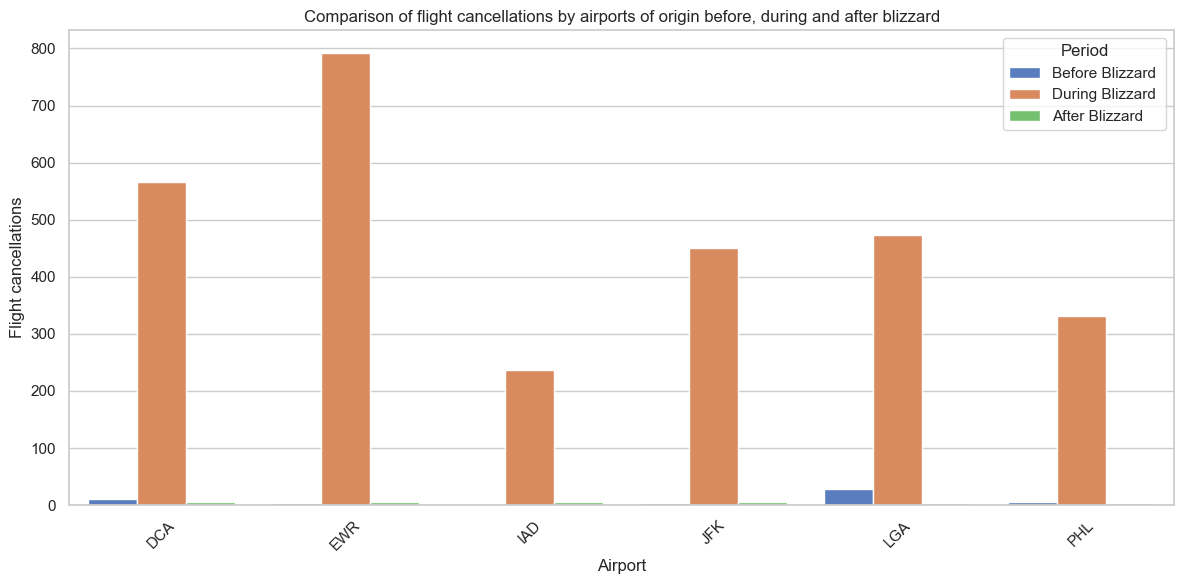

In [110]:
# Plot of flight cancellation before, during and after blizzard grouped by airport
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='origin', y='cancelled', hue='period', data=combined_df_2, palette='muted')
plt.title(f'Comparison of flight cancellations by airports of origin before, during and after blizzard')
plt.xlabel('Airport')
plt.ylabel('Flight cancellations')
plt.xticks(rotation=45)
plt.legend(title='Period')
plt.tight_layout()
plt.show()

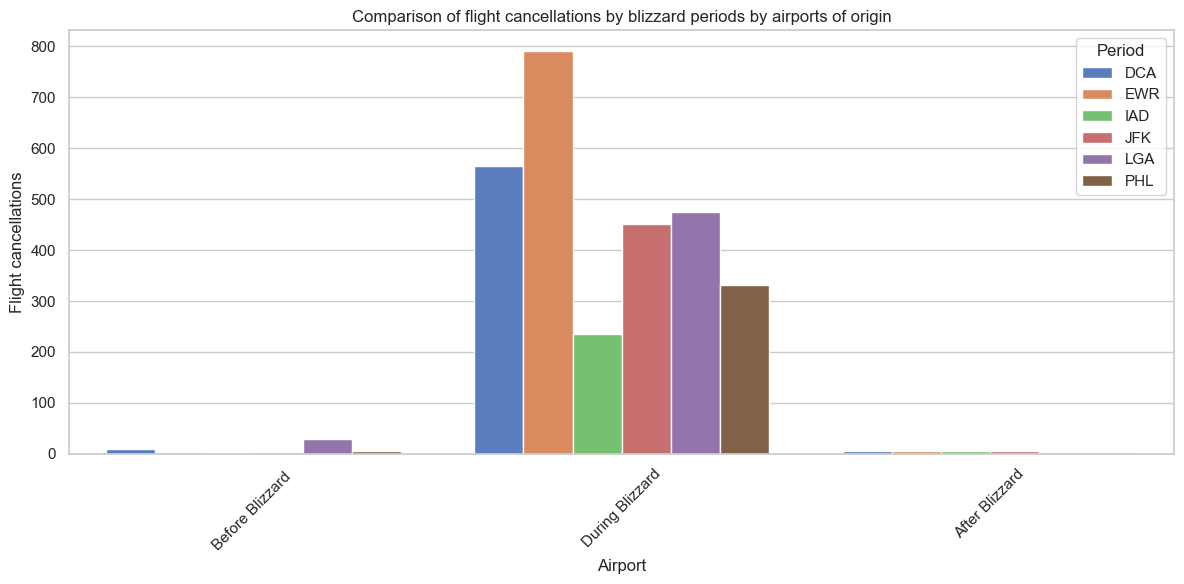

In [111]:
# Plot of flight cancellation before, during and after blizzard grouped by period
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='period', y='cancelled', hue='origin', data=combined_df_2, palette='muted')
plt.title(f'Comparison of flight cancellations by blizzard periods by airports of origin')
plt.xlabel('Airport')
plt.ylabel('Flight cancellations')
plt.xticks(rotation=45)
plt.legend(title='Period')
plt.tight_layout()
plt.show()

In [ ]:
# reference codes
sns.set(style="whitegrid")

# List of metrics to plot
#metrics = ['weather_tavg', 'weather_tmin', 'weather_tmax', 'weather_prcp', 'weather_snow', 'weather_wspd', 'weather_pres']
# Plot each metric in a separate figure
#for metric in metrics:
plt.figure(figsize=(12, 6))
sns.barplot(x='airport', y='weather_prcp', hue='period', data=combined_final, palette='muted')
plt.title(f'Comparison of weather_prcp (daily precipitation)Across Periods')
plt.xlabel('Airport')
plt.ylabel('weather_prcp')
plt.xticks(rotation=45)
plt.legend(title='Period')
plt.tight_layout()
plt.show()

In [ ]:
# reference codes
df_selected_airports_by_origin = df_flights_airports_origin.groupby(['origin','flight_date']).agg({'cancelled':'sum'})

In [113]:
df_selected_airports_origin_all = df_flights_airports_origin.groupby(['flight_date']).agg({'cancelled':'sum'})

/var/folders/v5/85s6yxcj4sj_sk392r1q_l800000gn/T/ipykernel_72161/3581892821.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='flight_date', y='cancelled', data=df_selected_airports_origin_all, palette='muted')
/opt/miniconda3/envs/nf_sql/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/envs/nf_sql/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


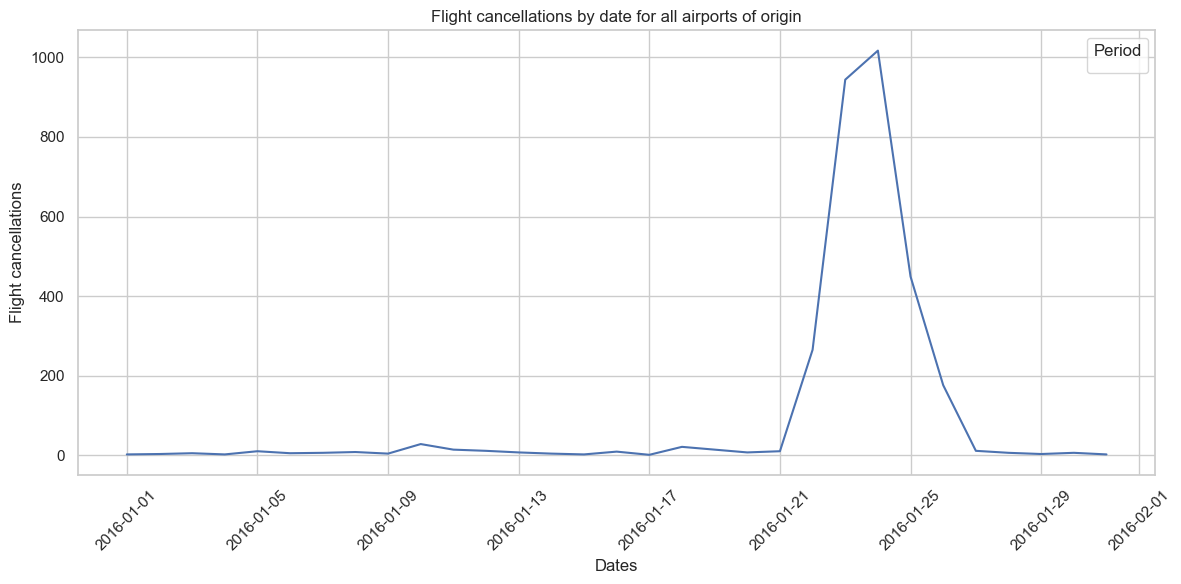

In [114]:
# plot all dates and origin data only

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='flight_date', y='cancelled', data=df_selected_airports_origin_all, palette='muted')
#sns.lineplot(x='flight_date', y=['cancelled','dep_delay'], data=df_selected_airports_origin_all, palette='muted')
plt.title(f'Flight cancellations by date for all airports of origin')
#plt.annotations=('23-24 Jan blizzard', xy==('2016-01-23',10), arrowprops==dict(facecolor='purple', shrink=0.05, annotation_clip =False))
plt.xlabel('Dates')
plt.ylabel('Flight cancellations')
plt.xticks(rotation=45)
plt.legend(title='Period')
plt.tight_layout()
plt.show()

In [ ]:
# reference codes by Nethravathy
df.plot(x="flight_date", y=["cancelled", "weather_snow"], kind="bar", rot=0,alpha = 1)
plt.title(f'comparing weather_snow and cancelled flights on date')
plt.xlabel('flight_date')
plt.ylabel('weather_snow')
plt.xticks(rotation=95)
plt.show



df.plot(x="flight_date", y=["cancelled", "weather_snow"], kind="line", rot=0,alpha = 1)
plt.title(f'comparing weather_snow and cancelled flights on date')
plt.xlabel('flight_date')
plt.ylabel('weather_snow')
plt.xticks(rotation=95)
plt.show

df.plot(x="flight_date", y=["cancelled", "weather_snow","dep_delay"], kind="line", rot=0,alpha = 1)
plt.title(f'comparing weather_snow and cancelled flights on date')
plt.xlabel('flight_date')
plt.ylabel('weather_snow')
plt.xticks(rotation=95)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

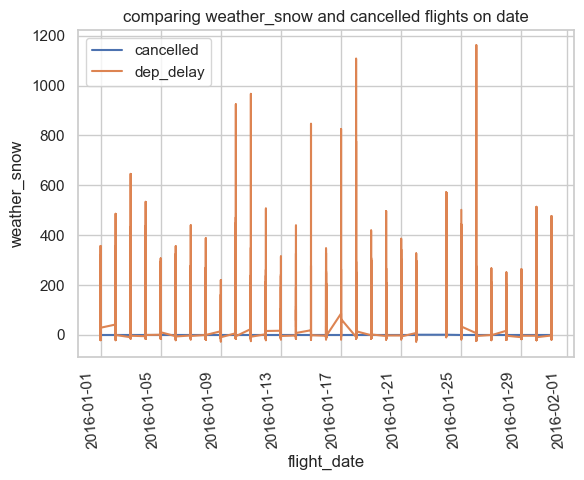

In [116]:
df_flights_airports_origin.plot(x="flight_date", y=["cancelled","dep_delay"], kind="line", rot=0,alpha = 1)
plt.title(f'comparing weather_snow and cancelled flights on date')
plt.xlabel('flight_date')
plt.ylabel('weather_snow')
plt.xticks(rotation=95)
plt.show

Calculating destination  airports

In [117]:
df_flights_airports_dest = df_f_a_merged[df_f_a_merged['dest'].isin(['JFK', 'LGA', 'EWR', 'PHL', 'IAD', 'DCA'])]

In [118]:
# only dest datasets
during_blizzard = df_flights_airports_dest[(df_flights_airports_dest['flight_date']>='2016-01-22') & (df_flights_airports_origin['flight_date'] <= '2016-01-26')]
before_blizzard= df_flights_airports_dest[(df_flights_airports_dest['flight_date']>='2016-01-17') & (df_flights_airports_origin['flight_date'] <= '2016-01-21')]
after_blizzard = df_flights_airports_dest[(df_flights_airports_dest['flight_date']>='2016-01-27') & (df_flights_airports_origin['flight_date'] <= '2016-01-31')]
df_jan23_24_data_only = df_flights_airports_dest[(df_flights_airports_dest['flight_date']>='2016-01-23') & (df_flights_airports_origin['flight_date'] <= '2016-01-24')]


/var/folders/v5/85s6yxcj4sj_sk392r1q_l800000gn/T/ipykernel_72161/3537376543.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  during_blizzard = df_flights_airports_dest[(df_flights_airports_dest['flight_date']>='2016-01-22') & (df_flights_airports_origin['flight_date'] <= '2016-01-26')]
/var/folders/v5/85s6yxcj4sj_sk392r1q_l800000gn/T/ipykernel_72161/3537376543.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  before_blizzard= df_flights_airports_dest[(df_flights_airports_dest['flight_date']>='2016-01-17') & (df_flights_airports_origin['flight_date'] <= '2016-01-21')]
/var/folders/v5/85s6yxcj4sj_sk392r1q_l800000gn/T/ipykernel_72161/3537376543.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after_blizzard = df_flights_airports_dest[(df_flights_airports_dest['flight_date']>='2016-01-27') & (df_flights_airports_origin['flight_date'] <= '2016-01-31')]
/var/folders/v5/85s6yxcj4sj_sk392r1q

In [120]:
# before blizzard grouped by dest
period_summary_before_blizzard_d = before_blizzard.groupby(['dest']).agg({
    'cancelled': 'sum',
    'arr_delay': 'mean'
})
period_summary_before_blizzard_d['period'] ='Before Blizzard'
period_summary_before_blizzard_d.reset_index()

,dest,cancelled,arr_delay,period
0,DCA,4,17.071429,Before Blizzard
1,EWR,0,-2.321429,Before Blizzard
2,IAD,0,6.200000,Before Blizzard
3,JFK,0,4.240000,Before Blizzard
4,LGA,4,25.215190,Before Blizzard
5,PHL,1,-2.000000,Before Blizzard


In [121]:
# before blizzard grouped by flights and dest
period_summary_before_blizzard_fd = before_blizzard.groupby(['flight_date']).agg({
    'cancelled': 'sum',
    'arr_delay': 'mean'
})
period_summary_before_blizzard_fd['period'] ='Before Blizzard '
period_summary_before_blizzard_fd.reset_index()

,flight_date,cancelled,arr_delay,period
0,2016-01-17,0,14.837209,Before Blizzard
1,2016-01-18,4,17.372549,Before Blizzard
2,2016-01-19,4,26.375000,Before Blizzard
3,2016-01-20,1,2.118644,Before Blizzard
4,2016-01-21,0,11.551724,Before Blizzard


In [122]:
# during blizzard grouped by dest
period_summary_during_blizzard_d = during_blizzard.groupby(['dest']).agg({
    'cancelled': 'sum',
    'arr_delay': 'mean'
})
period_summary_during_blizzard_d['period'] ='During Blizzard'
period_summary_during_blizzard_d.reset_index()

,dest,cancelled,arr_delay,period
0,DCA,57,6.18750,During Blizzard
1,EWR,22,-12.75000,During Blizzard
2,IAD,11,6.62500,During Blizzard
3,JFK,13,4.50000,During Blizzard
4,LGA,34,15.25641,During Blizzard
5,PHL,9,17.00000,During Blizzard


In [123]:
# during blizzard grouped by flights and dest
period_summary_during_blizzard_fd = during_blizzard.groupby(['flight_date']).agg({
    'cancelled': 'sum',
    'arr_delay': 'mean'
})
period_summary_during_blizzard_fd['period'] ='During Blizzard'
period_summary_during_blizzard_fd.reset_index()

,flight_date,cancelled,arr_delay,period
0,2016-01-22,23,0.382353,During Blizzard
1,2016-01-23,24,NaN,During Blizzard
2,2016-01-24,49,NaN,During Blizzard
3,2016-01-25,35,28.347826,During Blizzard
4,2016-01-26,15,7.288889,During Blizzard


In [124]:
# after blizzard grouped by dest
period_summary_after_blizzard_d = after_blizzard.groupby(['dest']).agg({
    'cancelled': 'sum',
    'arr_delay': 'mean'
})
period_summary_after_blizzard_d['period'] ='After Blizzard'
period_summary_after_blizzard_d.reset_index()

,dest,cancelled,arr_delay,period
0,DCA,1,-2.544444,After Blizzard
1,EWR,0,-7.000000,After Blizzard
2,IAD,0,0.631579,After Blizzard
3,JFK,0,3.520000,After Blizzard
4,LGA,1,0.000000,After Blizzard
5,PHL,0,-15.823529,After Blizzard


In [125]:
# after blizzard grouped by flights and  dest
period_summary_after_blizzard_fd = after_blizzard.groupby(['flight_date']).agg({
    'cancelled': 'sum',
    'arr_delay': 'mean'
})
period_summary_after_blizzard_fd['period'] ='After Blizzard'
period_summary_after_blizzard_fd.reset_index()

,flight_date,cancelled,arr_delay,period
0,2016-01-27,0,-0.200000,After Blizzard
1,2016-01-28,2,-5.321429,After Blizzard
2,2016-01-29,0,8.603448,After Blizzard
3,2016-01-30,0,-11.240000,After Blizzard
4,2016-01-31,0,-9.816327,After Blizzard


In [126]:
# combination  of during, before, after blizzard grouped by dest
combined_df_dest_1 = pd.concat([period_summary_before_blizzard_d,period_summary_during_blizzard_d,period_summary_after_blizzard_d])

In [127]:
combined_df_dest_2 = combined_df_dest_1.reset_index()


In [128]:
combined_df_dest_2

,dest,cancelled,arr_delay,period
0,DCA,4,17.071429,Before Blizzard
1,EWR,0,-2.321429,Before Blizzard
2,IAD,0,6.200000,Before Blizzard
3,JFK,0,4.240000,Before Blizzard
4,LGA,4,25.215190,Before Blizzard
5,PHL,1,-2.000000,Before Blizzard
6,DCA,57,6.187500,During Blizzard
7,EWR,22,-12.750000,During Blizzard
8,IAD,11,6.625000,During Blizzard
9,JFK,13,4.500000,During Blizzard


In [129]:
df_selected_airports_dest_all = df_flights_airports_dest.groupby(['flight_date']).agg({'cancelled':'sum'})

In [ ]:
#df_selected_airports_dest_all = df_flights_airports_dest.groupby(['flight_date']).agg({'cancelled':'sum', 'dep_delay': 'mean'})

In [ ]:
#df_selected_airports_dest_all = df_flights_airports_dest.groupby(['flight_date']).agg({'dep_delay': 'mean'})

<function matplotlib.pyplot.show(close=None, block=None)>

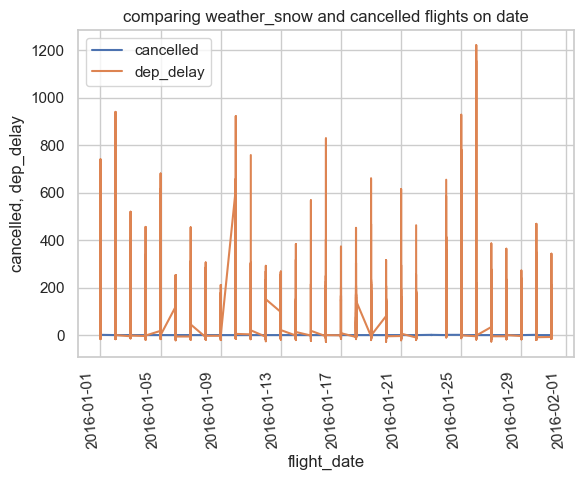

In [131]:
df_flights_airports_dest.plot(x="flight_date", y=["cancelled", "dep_delay"], kind="line", rot=0,alpha = 1)
plt.title(f'comparing weather_snow and cancelled flights on date')
plt.xlabel('flight_date')
plt.ylabel('cancelled, dep_delay')
plt.xticks(rotation=95)
plt.show

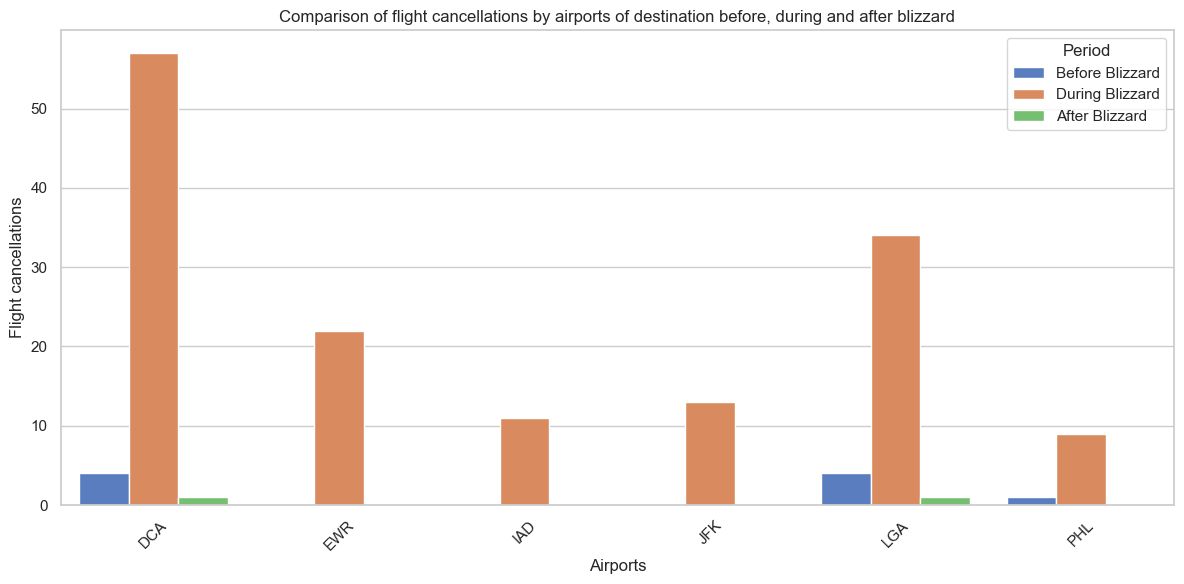

In [133]:
# Plot of flight cancellation before, during and after blizzard grouped by airport
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='dest', y='cancelled', hue='period', data=combined_df_dest_2, palette='muted')
plt.title(f'Comparison of flight cancellations by airports of destination before, during and after blizzard')
plt.xlabel('Airports')
plt.ylabel('Flight cancellations')
plt.xticks(rotation=45)
plt.legend(title='Period')
plt.tight_layout()
plt.show()

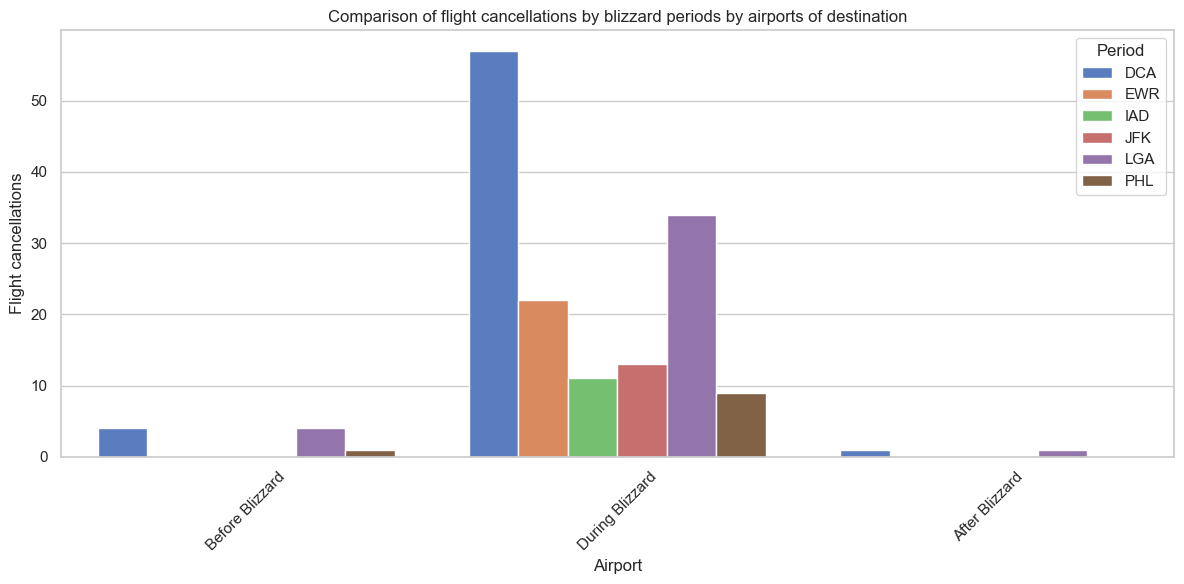

In [134]:
# Plot of flight cancellation before, during and after blizzard grouped by period
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='period', y='cancelled', hue='dest', data=combined_df_dest_2, palette='muted')
plt.title(f'Comparison of flight cancellations by blizzard periods by airports of destination')
plt.xlabel('Airport')
plt.ylabel('Flight cancellations')
plt.xticks(rotation=45)
plt.legend(title='Period')
plt.tight_layout()
plt.show()

/var/folders/v5/85s6yxcj4sj_sk392r1q_l800000gn/T/ipykernel_72161/811286611.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='flight_date', y='cancelled', data=df_f_a_merged, palette='muted')
/opt/miniconda3/envs/nf_sql/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/envs/nf_sql/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


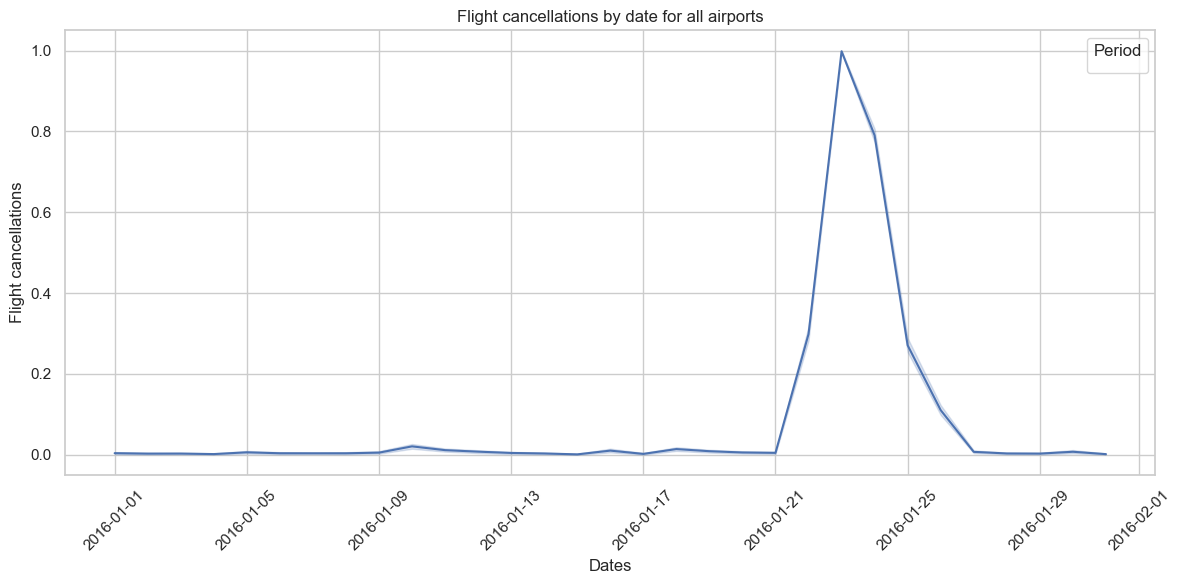

In [137]:
# plot flight and  cancellation  by all data
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='flight_date', y='cancelled', data=df_f_a_merged, palette='muted')
#sns.lineplot(x='flight_date', y=['cancelled','dep_delay'], data=df_selected_airports_origin_all, palette='muted')
plt.title(f'Flight cancellations by date for all airports')
#plt.annotations=('23-24 Jan blizzard', xy==('2016-01-23',10), arrowprops==dict(facecolor='purple', shrink=0.05, annotation_clip =False))
plt.xlabel('Dates')
plt.ylabel('Flight cancellations')
plt.xticks(rotation=45)
plt.legend(title='Period')
plt.tight_layout()
plt.show()

/var/folders/v5/85s6yxcj4sj_sk392r1q_l800000gn/T/ipykernel_72161/174813624.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='flight_date', y='cancelled', data=df_selected_airports_dest_all, palette='muted')
/opt/miniconda3/envs/nf_sql/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/envs/nf_sql/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


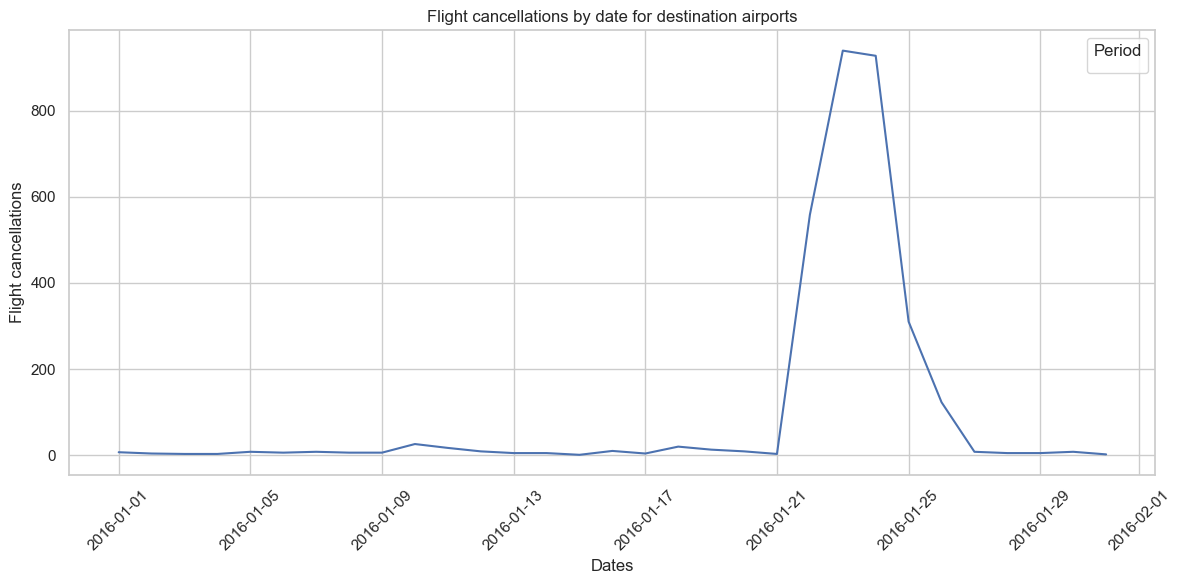

In [156]:
# plot flight and  cancellation  by destination data
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='flight_date', y='cancelled', data=df_selected_airports_dest_all, palette='muted')
#sns.lineplot(x='flight_date', y=['cancelled','dep_delay'], data=df_selected_airports_origin_all, palette='muted')
plt.title(f'Flight cancellations by date for destination airports')
#plt.annotations=('23-24 Jan blizzard', xy==('2016-01-23',10), arrowprops==dict(facecolor='purple', shrink=0.05, annotation_clip =False))
plt.xlabel('Dates')
plt.ylabel('Flight cancellations')
plt.xticks(rotation=45)
plt.legend(title='Period')
plt.tight_layout()
plt.show()

/var/folders/v5/85s6yxcj4sj_sk392r1q_l800000gn/T/ipykernel_72161/1739369743.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='flight_date', y='cancelled', data=df_flights_airports_origin, palette='muted')
/opt/miniconda3/envs/nf_sql/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/envs/nf_sql/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


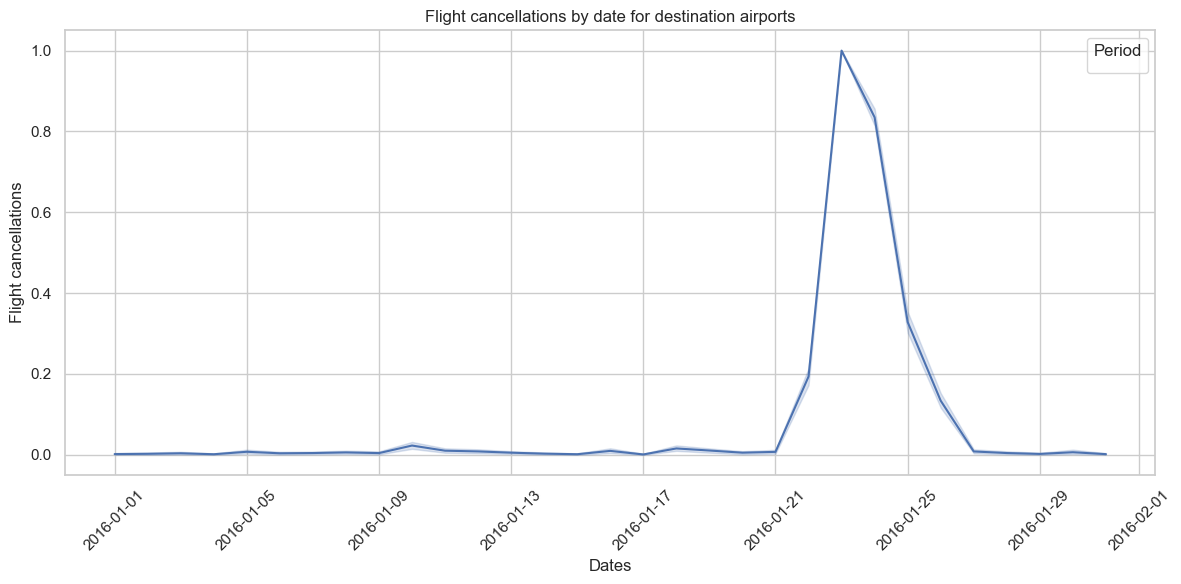

In [154]:
# testing  for  origin airports
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='flight_date', y='cancelled', data=df_flights_airports_origin, palette='muted')
#sns.lineplot(x='flight_date', y=['cancelled','dep_delay'], data=df_selected_airports_origin_all, palette='muted')
plt.title(f'Flight cancellations by date for destination airports')
#plt.annotations=('23-24 Jan blizzard', xy==('2016-01-23',10), arrowprops==dict(facecolor='purple', shrink=0.05, annotation_clip =False))
plt.xlabel('Dates')
plt.ylabel('Flight cancellations')
plt.xticks(rotation=45)
plt.legend(title='Period')
plt.tight_layout()
plt.show()

In [ ]:
## plots for Jan 23-24 only

In [138]:
comparison_data_23_24Jan = { 
    'Category':['All airports', 'Origin Airports', 'Dest Airports'],
    'Percentage': [88.1, 90.7,86.1]
}

In [139]:
comparison_data_before_blizzard = { 
    'Category':['All airports', 'Origin Airports', 'Dest Airports'],
    'Percentage': [0.7, 0.3,0.4]
}

In [ ]:
comparison_data_during_blizzard = { 
    'Category':['All airports', 'Origin Airports', 'Dest Airports'],
    'Percentage': [45.7, 35.1,46.1]
}

In [ ]:
comparison_data_after_blizzard = { 
    'Category':['All airports', 'Origin Airports', 'Dest Airports'],
    'Percentage': [0.4, 0.4,0.4]
}

In [143]:
# test codes - ignore
data = {
    'Dataset': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C'],
    'Category': ['All', 'Origin', 'Dest', 'All', 'Origin', 'Dest', 'All', 'Origin', 'Dest'],
    'Percentage': [0.7, 0.3, 0.4, 45.7, 35.1, 46.1, 0.4, 0.4, 0.4]
}

df = pd.DataFrame(data)

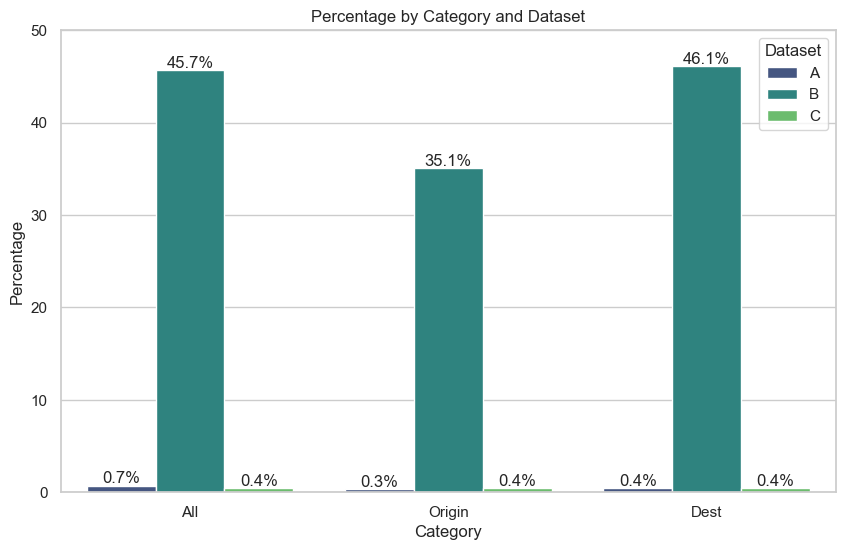

In [144]:
# test codes  - ignore
plt.figure(figsize=(10, 6))

bar_plot = sns.barplot(x='Category', y='Percentage', hue='Dataset', data=df, palette='viridis')

plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Percentage by Category and Dataset')

# Add the values on top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.1f') + '%', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 5), 
                      textcoords = 'offset points')

plt.ylim(0, 50)
plt.show()

In [145]:
# test codes -  ignore
data = {
    'Dataset': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C'],
    'Category': ['All', 'Origin', 'Dest', 'All', 'Origin', 'Dest', 'All', 'Origin', 'Dest'],
    'Percentage': [0.7, 0.3, 0.4, 45.7, 35.1, 46.1, 0.4, 0.4, 0.4]
}

df = pd.DataFrame(data)

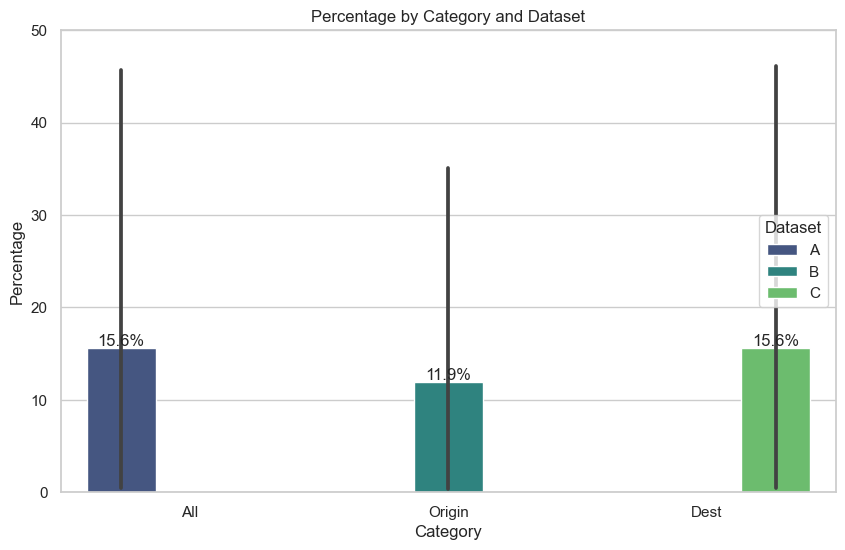

In [146]:
# test codes - ignore
plt.figure(figsize=(10, 6))

bar_plot = sns.barplot(x='Category', y='Percentage', hue='Dataset', data=df, palette='viridis')

plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Percentage by Category and Dataset')

# Add the values on top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.1f') + '%', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 5), 
                      textcoords = 'offset points')

plt.ylim(0, 50)
plt.show()

In [157]:
# cancellation counts by all flights
cancellation_counts_f = df_flights.groupby('flight_date').agg(cancellation_count =('cancelled', 'sum'))
cancellation_counts_f_clean  = cancellation_counts_f.reset_index()
cancellation_counts_f_clean

,flight_date,cancellation_count
0,2016-01-01,9
1,2016-01-02,7
2,2016-01-03,8
3,2016-01-04,5
4,2016-01-05,16
5,2016-01-06,10
6,2016-01-07,10
7,2016-01-08,10
8,2016-01-09,10
9,2016-01-10,50


In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

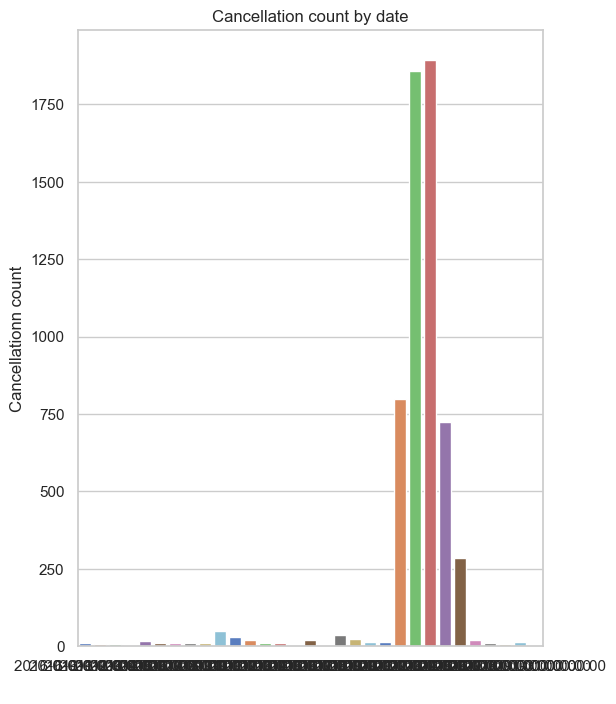

In [160]:
# plot cancellation counts by date
plt.figure(figsize=(6, 8))

sns.barplot(x='flight_date', y='cancellation_count', data=cancellation_counts_f_clean, palette='muted')

plt.xlabel(' ')
plt.ylabel('Cancellationn count')
plt.title('Cancellation count by date')

#plt.ylim(0, 100)
plt.show()